# Girls Who Code Week 4 - Introduction to MatPlotLib Line Plots

## Welcome back!
Let's talk about using Matplotlib, the go-to library for plotting in Python. We will start by importing matplotlib.

In [18]:
import matplotlib.pyplot as plt

Now that we have MatPlotLib imported, we will create a simple plot using the `.plot()` method.

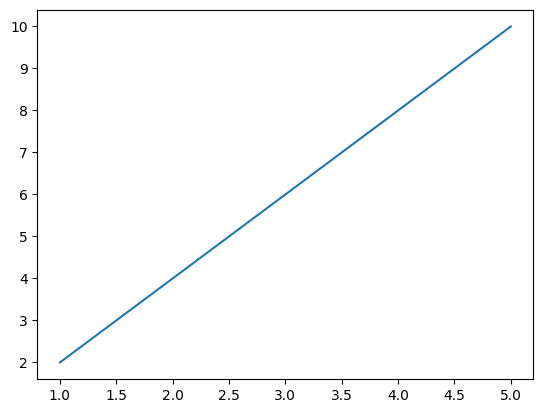

In [19]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.show()

Now, let's import pandas and bring in our dataset.

In [25]:
import pandas as pd

csv = "https://tinyurl.com/GWC-olympics"
df = pd.read_csv(csv, skiprows=5)
df = df.drop(df.columns[8], axis=1)

This code first filters the DataFrame `df` so that it only includes rows where the country code (`NOC`) is `"USA"` and the medal type is `"Gold"`. That gives us a new DataFrame, `usa_gold`, containing only the U.S. gold medal results.

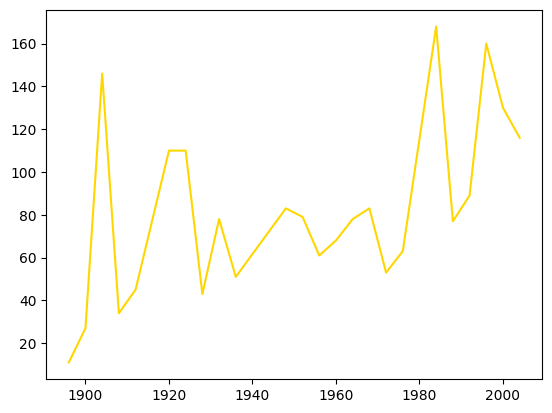

In [30]:
usa_gold = df[(df["NOC"] == "USA") & (df["Medal"] == "Gold")]

# .groupby("Year").size() groups the data by Olympic year and counts how many gold medals were won in each year
gold_medal_counts = usa_gold.groupby("Year").size()

# creates a line plot where the x-axis is the Olympic year and the y-axis is the number of U.S. gold medals
plt.plot(gold_medal_counts.index, gold_medal_counts.values, color='gold')
plt.show()


This code compares the gold medal results of the USA and Great Britain over time.

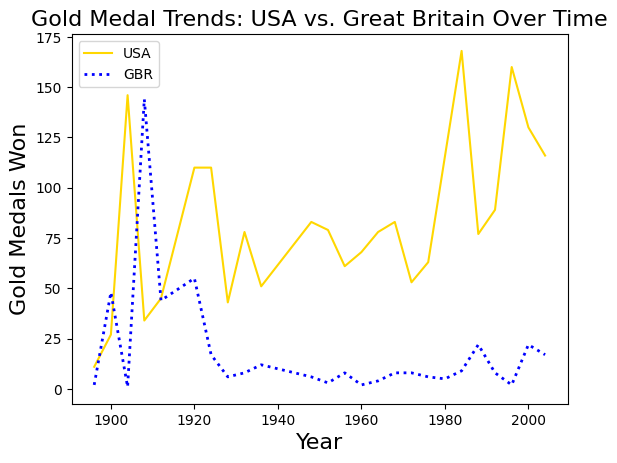

In [44]:
# usa_gold includes only rows where the country code (NOC) is "USA" and the medal is "Gold"
# gbr_gold does the same for "GBR"
usa_gold = df[(df["NOC"] == "USA") & (df["Medal"] == "Gold")]
gbr_gold = df[(df["NOC"] == "GBR") & (df["Medal"] == "Gold")]

# each dataset is grouped by "Year" and counted using .groupby("Year").size()
usa_gold_counts = usa_gold.groupby("Year").size()
gbr_gold_counts = gbr_gold.groupby("Year").size()

# USA gold count is plotted in a gold colors, and Britain's is in blue
# linestyle and linewidth parameters control how the line looks and how thick it is
plt.plot(usa_gold_counts.index, usa_gold_counts.values, color='gold', linewidth=2, label='USA')
plt.plot(gbr_gold_counts.index, gbr_gold_counts.values, linestyle=':', linewidth=2, color='blue', label='GBR')

# add a title to the plot and set font size
plt.title("Gold Medal Trends: USA vs. Great Britain Over Time", fontsize=16)

# add titles to the x and y axes and set font size
plt.xlabel("Year", fontsize=16)
plt.ylabel("Gold Medals Won", fontsize=16)

# add a legend
plt.legend(loc="upper left")

# show the plot
plt.show()


### Adding legends: what is the `loc` parameter?

The `loc` parameter tells Matplotlib where to place the legend box inside the plot. You can pass keywords like `"upper left"`, `"upper right"`, `"lower left"`, `"lower right"`, `"center"`, etc. If your legend overlaps important data points,`loc` is nice so you can move it to a clearer part of the chart.

### Line Styles in Matplotlib

The `linestyle` parameter controls how the plotted line is drawn. Some common options are:

`'-'` = Solid line (default)

`'--'` = Dashed line

`':'` = Dotted line

### Setting Axis Limits

Using pandas, find the first year that the data starts and the last year that the data ends. HINT: You can use `.head()` and `.tail()` to look at the first and last value in the column or the `min` and `max` methods to do this

The dataset covers Olympic years from 1896 to 2004.




(1896.0, 2004.0)

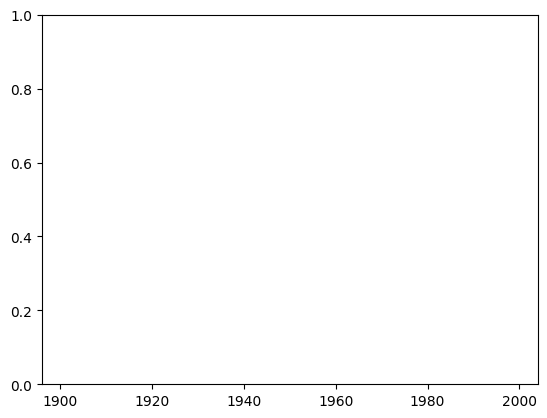

In [42]:
start_year = df["Year"].min()
end_year = df["Year"].max()

print(f"The dataset covers Olympic years from {start_year} to {end_year}." + '\n\n')

# Since we only need from 1896 to 2004, we can set the x-axis to only plot from those values:
plt.xlim(start_year, end_year)

# Final Completed Code

The dataset covers Olympic years from 1896 to 2004.


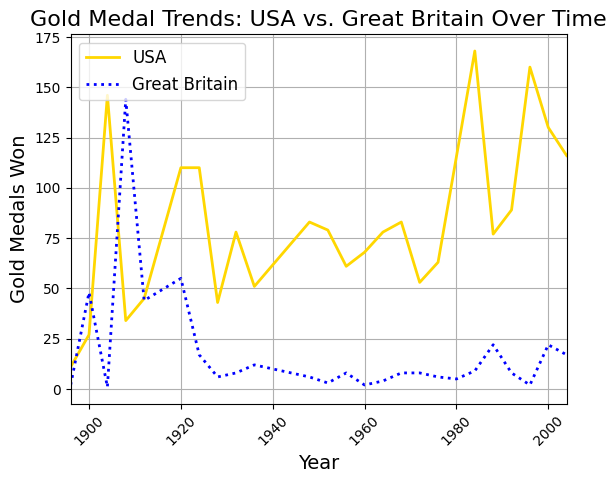

In [37]:
# Find the earliest and latest years in the dataset
start_year = df["Year"].min()
end_year = df["Year"].max()

print(f"The dataset covers Olympic years from {start_year} to {end_year}.")

usa_gold = df[(df["NOC"] == "USA") & (df["Medal"] == "Gold")]
gbr_gold = df[(df["NOC"] == "GBR") & (df["Medal"] == "Gold")]

# Count the number of Gold medals won per year (Year remains a string)
usa_gold_counts = usa_gold.groupby("Year").size()
gbr_gold_counts = gbr_gold.groupby("Year").size()

# Plot the data
plt.plot(usa_gold_counts.index, usa_gold_counts.values, linestyle='-', color='gold', linewidth=2, label="USA")
plt.plot(gbr_gold_counts.index, gbr_gold_counts.values, linestyle=':', color='blue', linewidth=2, label="Great Britain")  # Dotted line

# Formatting
plt.title("Gold Medal Trends: USA vs. Great Britain Over Time", fontsize=16)  # Title with font size
plt.xlabel("Year", fontsize=14)  # X-axis label with font size
plt.ylabel("Gold Medals Won", fontsize=14)  # Y-axis label with font size
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc="upper left", fontsize=12)  # Legend positioned in upper left
plt.grid(True)  # Enable grid lines

# Set x-axis limits to match available data
plt.xlim(start_year, end_year)

# Show plot
plt.show()
